Descriptions of the columns present in the dataset below.


datetime - hourly date + timestamp season - spring, summer, autumn, winter 

holiday - whether the day is considered a holiday 

workingday - whether the day is neither a weekend nor holiday 

weather - Clear , Cloudy, Light Rain, Heavy 

temp - temperature in Celsius 

atemp - "feels like" temperature in Celsius 

humidity - relative humidity 

windspeed - wind speed 

Total_booking - number of total booking



In [3]:
import pandas as pd
import numpy as np

from datetime import datetime
import calendar

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.metrics import mean_squared_log_error


In [4]:
# Concatenating the columns of train dataset and test dataset 
df11=pd.read_csv('train.csv')
df21=pd.read_csv('train_label.csv', header=None, names=['Total_Booking'])
df1=pd.concat([df11, df21], axis=1)

# Concatenating the columns of test dataset 
df12=pd.read_csv('test.csv')
df22=pd.read_csv('test_label.csv', header=None, names=['Total_Booking'])
df2 = pd.concat([df12, df22], axis=1)

print(df1.head())#Training data set
print(df2.head())#Testing data set

           datetime  season  holiday  ...  humidity windspeed  Total_Booking
0    5/2/2012 19:00  Summer        0  ...        77   16.9979            504
1     9/5/2012 4:00    Fall        0  ...        79   19.0012              5
2    1/13/2011 9:00  Spring        0  ...        50   22.0028            139
3  11/18/2011 16:00  Winter        0  ...        29    8.9981            209
4   9/13/2011 13:00    Fall        0  ...        51   19.0012            184

[5 rows x 10 columns]
           datetime  season  holiday  ...  humidity windspeed  Total_Booking
0   5/10/2012 11:00  Summer        0  ...        48   35.0008            256
1     6/9/2012 7:00  Summer        0  ...        64    7.0015             87
2    3/6/2011 20:00  Spring        0  ...       100   27.9993             11
3  10/13/2011 11:00  Winter        0  ...        83    0.0000             84
4    6/2/2012 12:00  Summer        0  ...        43   23.9994            668

[5 rows x 10 columns]


# New section

In [5]:
#shape of the dataset

print("shape of training dataset: ",df1.shape)
print("shape of testing dataset: ",df2.shape)


shape of training dataset:  (8708, 10)
shape of testing dataset:  (2178, 10)


In [6]:
#Datatypes of dataset

print("Data types  of training dataset: ",df1.dtypes)
print("Data types   of testing dataset: ",df2.dtypes)


Data types  of training dataset:  datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_Booking      int64
dtype: object
Data types   of testing dataset:  datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_Booking      int64
dtype: object


In [7]:
#Searching for missing values in dataset

print("Missing values in training dataset",df1.isna().sum())
print("Missing values in testing dataset",df2.isna().sum())

Missing values in training dataset datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64
Missing values in testing dataset datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_Booking    0
dtype: int64


In [8]:
#Creating new columns date, hour, weekDay, month from datetime column
#Train dataset
df1['date']=df1.datetime.apply(lambda x : x.split()[0])
df1['hour']=df1.datetime.apply(lambda x : x.split()[1].split(":")[0])
df1['weekday']=df1.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
df1['month']=df1.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

print(df1.head())

#Test dataset
df2['date']=df2.datetime.apply(lambda x : x.split()[0])
df2['hour']=df2.datetime.apply(lambda x : x.split()[1].split(":")[0])
df2['weekday']=df2.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
df2['month']=df2.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

print(df2.head())

           datetime  season  holiday  ...  hour    weekday      month
0    5/2/2012 19:00  Summer        0  ...    19  Wednesday        May
1     9/5/2012 4:00    Fall        0  ...     4  Wednesday  September
2    1/13/2011 9:00  Spring        0  ...     9   Thursday    January
3  11/18/2011 16:00  Winter        0  ...    16     Friday   November
4   9/13/2011 13:00    Fall        0  ...    13    Tuesday  September

[5 rows x 14 columns]
           datetime  season  holiday  ...  hour   weekday    month
0   5/10/2012 11:00  Summer        0  ...    11  Thursday      May
1     6/9/2012 7:00  Summer        0  ...     7  Saturday     June
2    3/6/2011 20:00  Spring        0  ...    20    Sunday    March
3  10/13/2011 11:00  Winter        0  ...    11  Thursday  October
4    6/2/2012 12:00  Summer        0  ...    12  Saturday     June

[5 rows x 14 columns]


In [9]:
#Coercing the datatype of season, holiday, workingday, and weather to category
categoryVariables=['season', 'holiday', 'workingday', 'weather','hour','weekday','month']
for var in categoryVariables:
    df1[var]=df1[var].astype('category')
    df2[var]=df2[var].astype('category')
df1.dtypes.value_counts()

float64     3
object      2
category    2
int64       2
category    1
category    1
category    1
category    1
category    1
dtype: int64

In [10]:
#Dropping the datetime column as we have already extracted useful features from it

df1.drop('datetime', axis=1, inplace=True)
df2.drop('datetime', axis=1, inplace=True)



Outlier Analysis: 



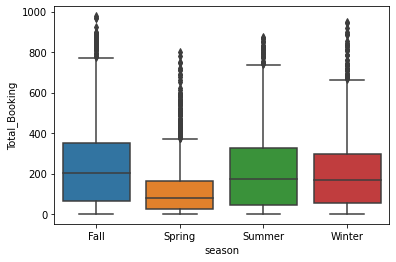

In [11]:
sns.boxplot(x = 'season', y = 'Total_Booking', data=df1)

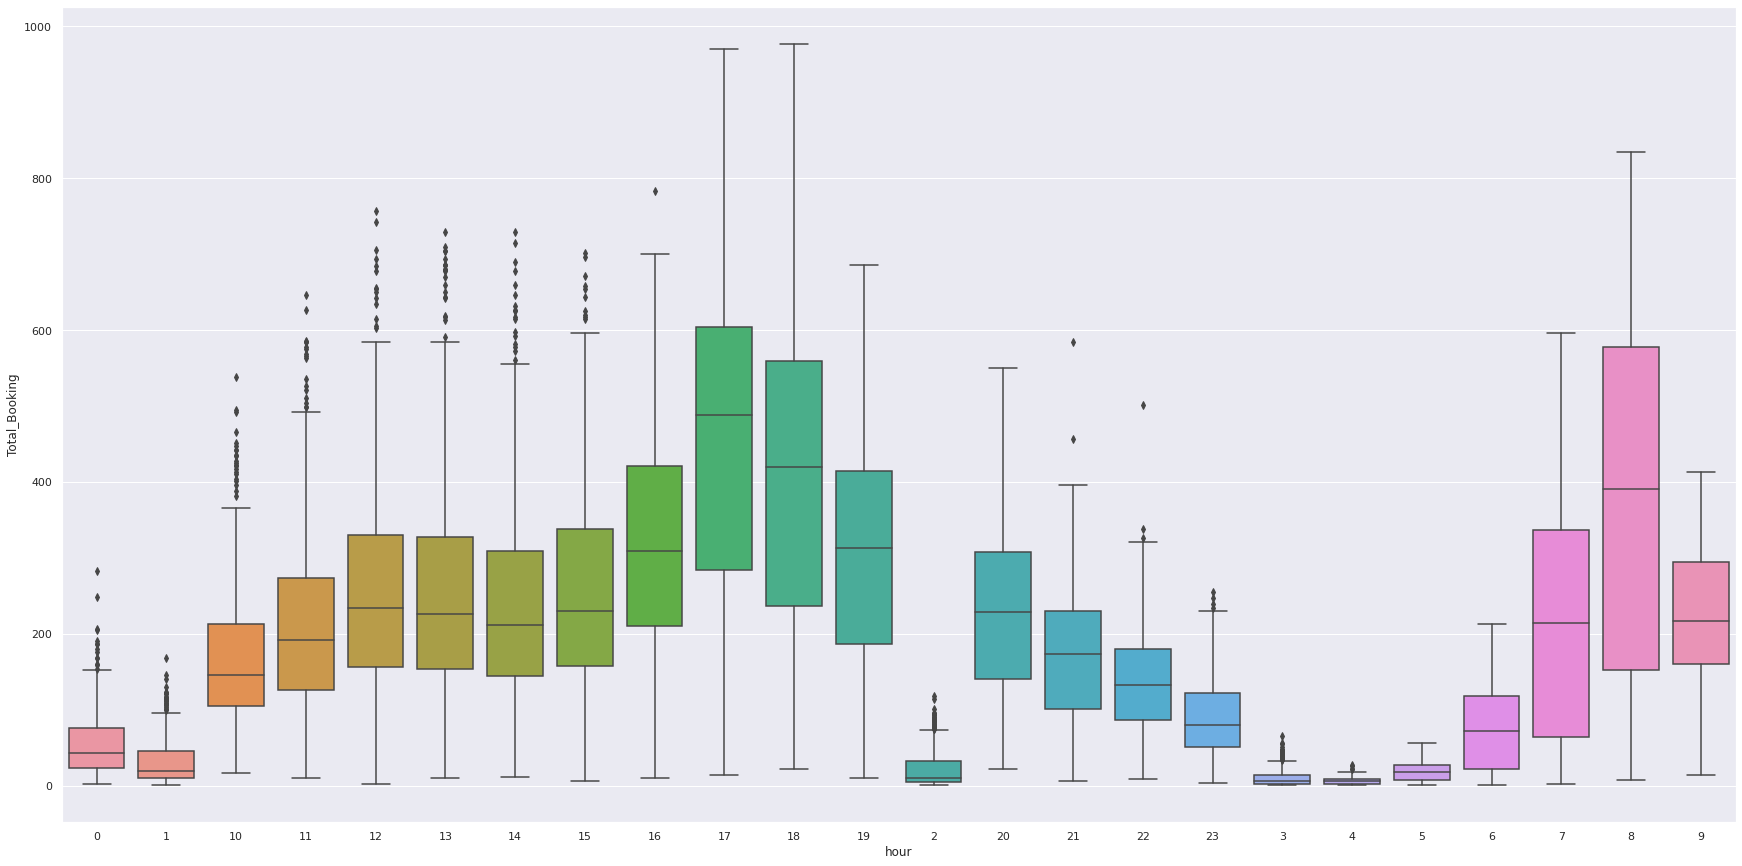

In [12]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(x = 'hour', y = 'Total_Booking', data=df1)

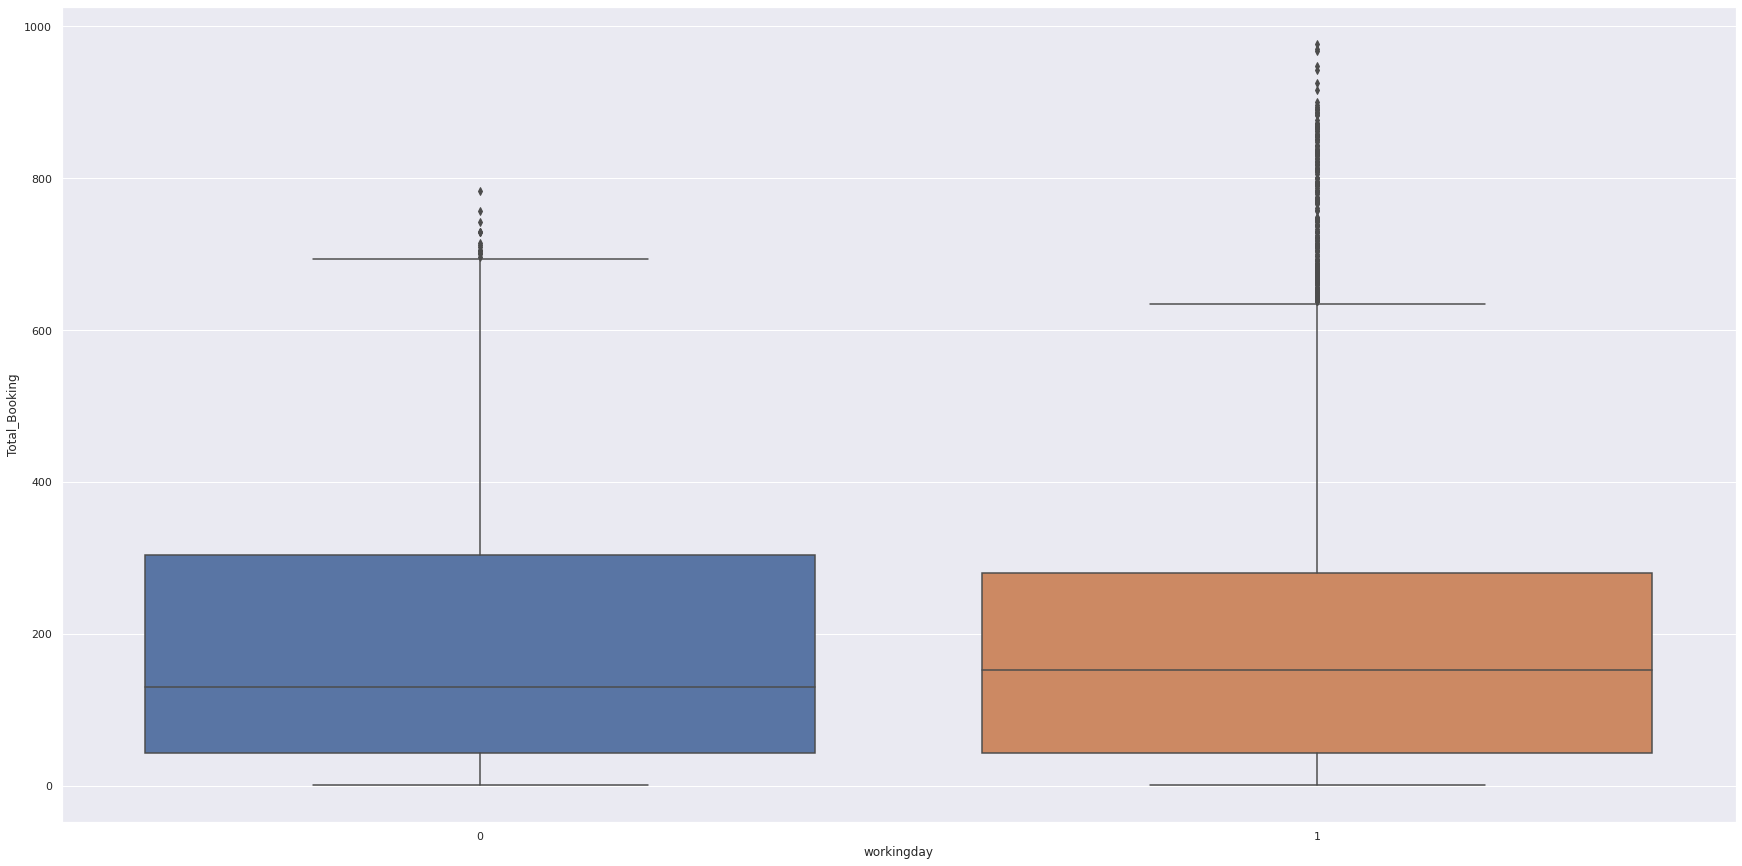

In [13]:
sns.boxplot(x = 'workingday', y = 'Total_Booking', data=df1)

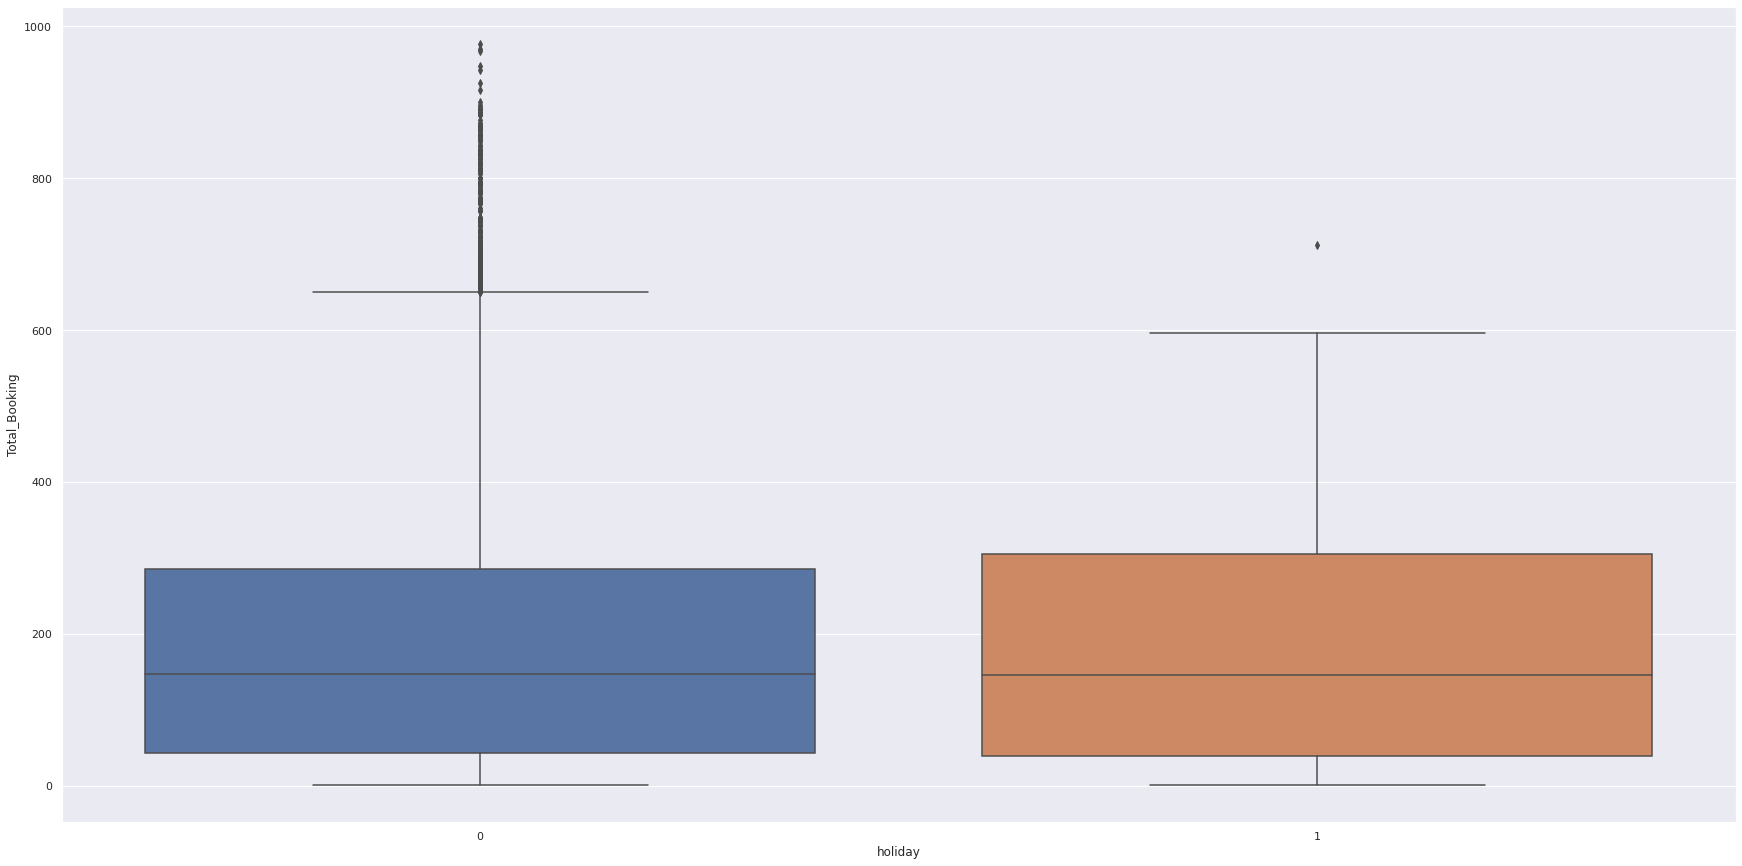

In [14]:
sns.boxplot(x = 'holiday', y = 'Total_Booking', data=df1)

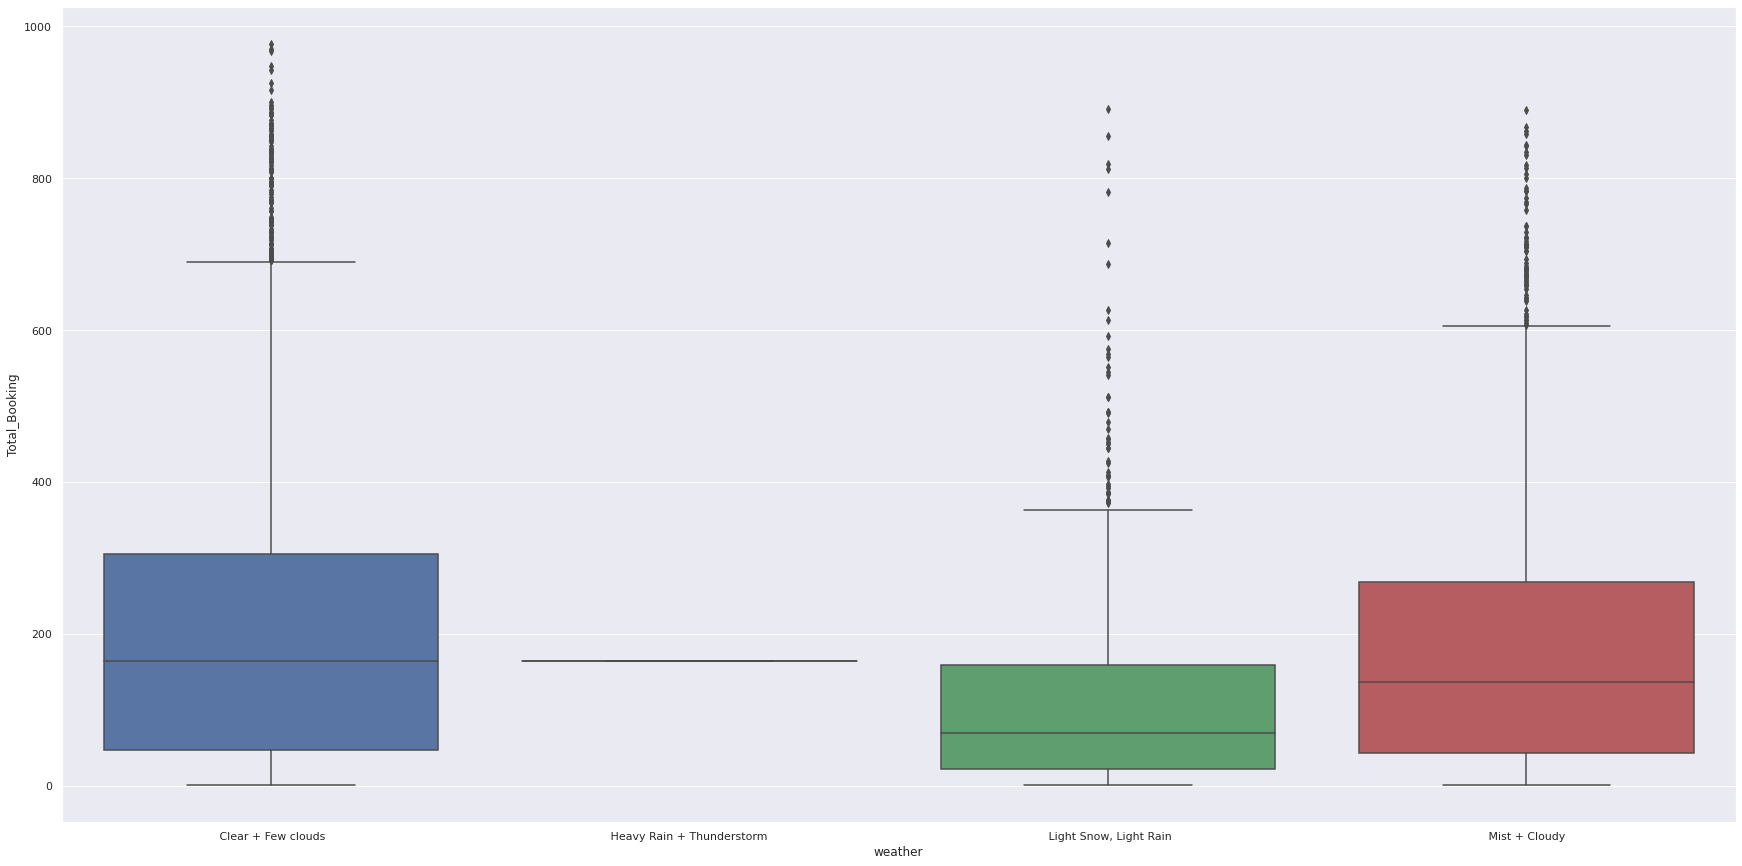

In [15]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(x = 'weather', y = 'Total_Booking',data=df1)

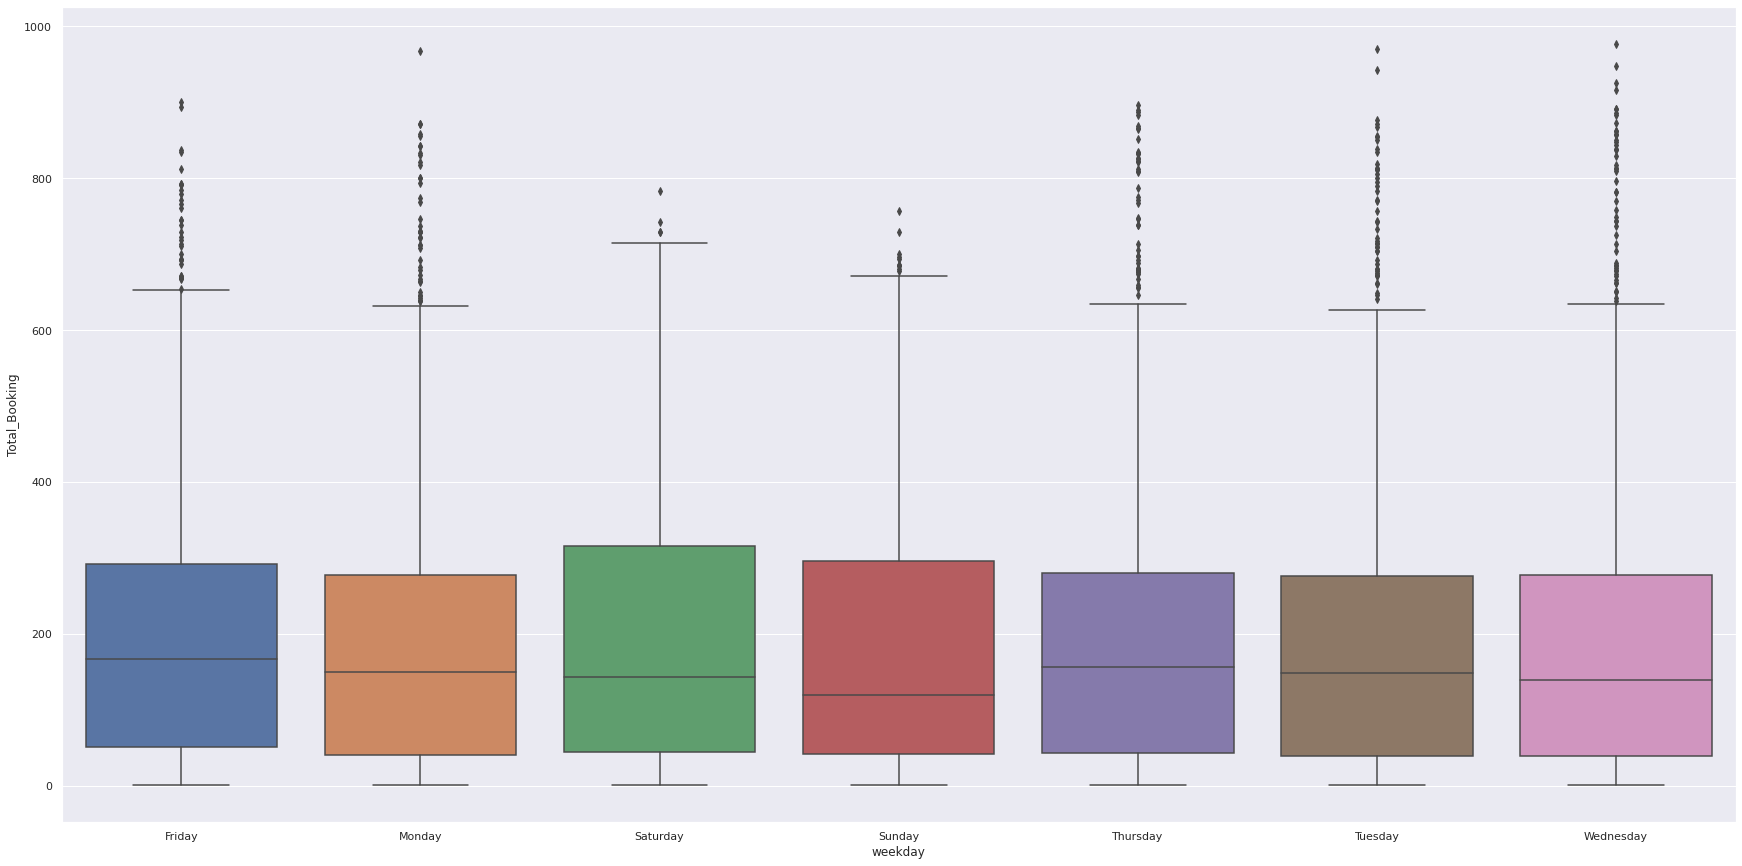

In [16]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(x = 'weekday', y = 'Total_Booking', data=df1)

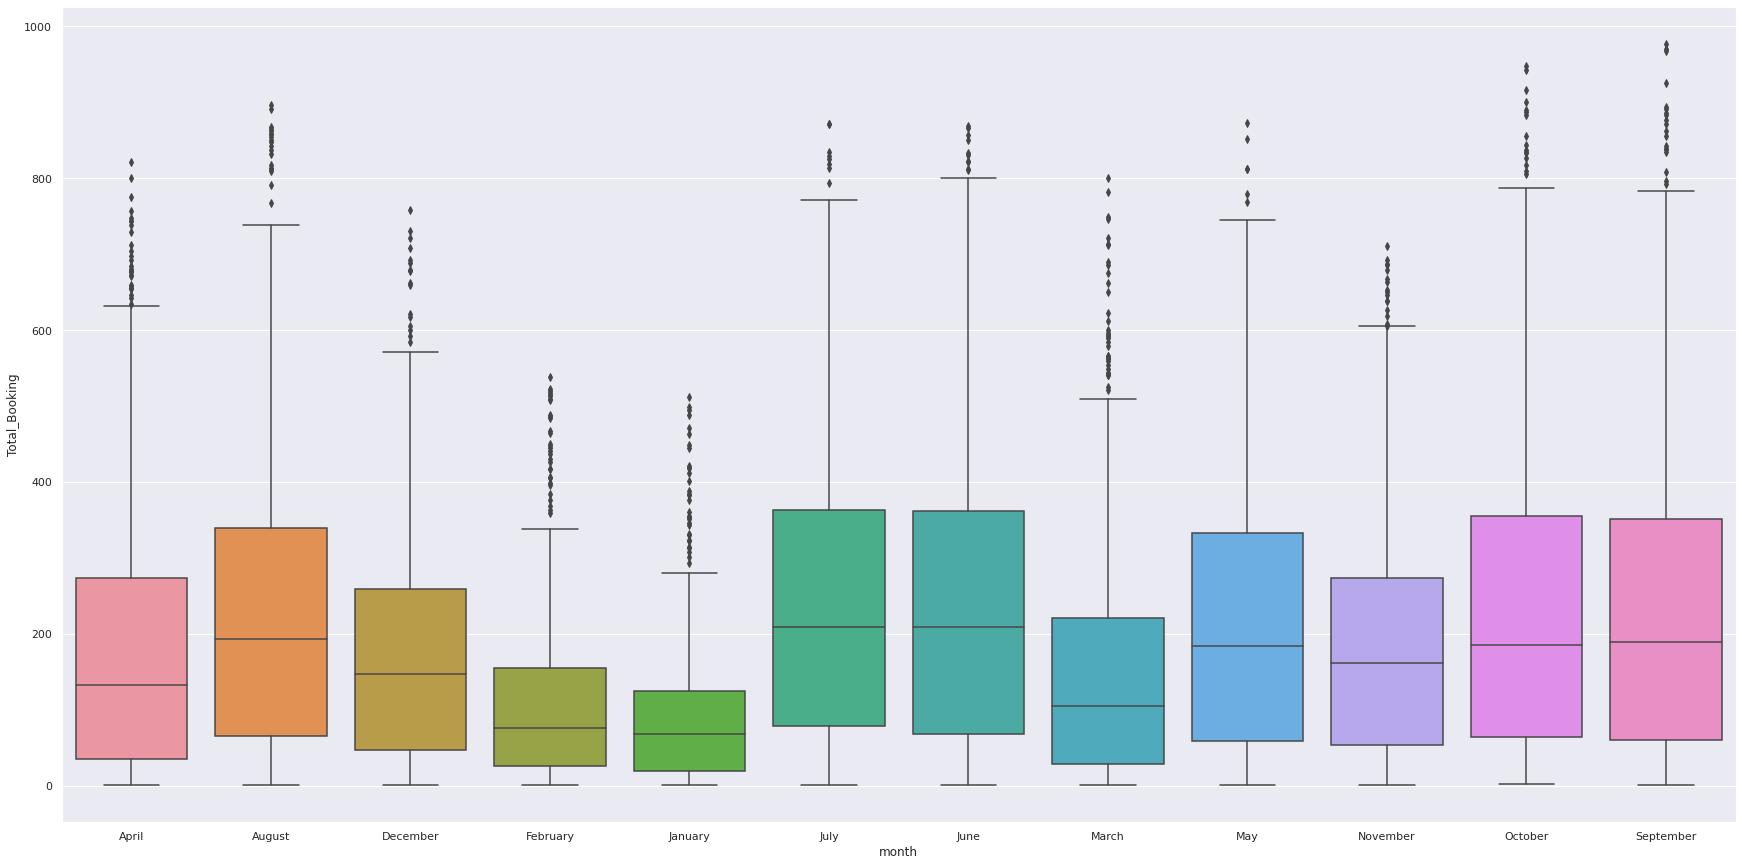

In [17]:
sns.set(rc={'figure.figsize':(30,15)})
sns.boxplot(x = 'month', y = 'Total_Booking', data=df1)

1)Spring season faced a fall in total booking compared to other seaons.

2)Morning hours 8-9am and evening 4pm-7pm shows a high demand of booking , mostly owing to office /school travel hours.

3)Working days shows more outliers compared to non working days.

4)Friday saturday and sunday shows slightly higher demand in booking may be due to weekend travels of people.

5)January and February shows lower booking rate compared to other months.

6)Heavy Rain and thunderstorm has a great impact by reducing total booking rate dramatically.



In [18]:
#removing outliers
clean_df1= df1[np.abs(df1['Total_Booking']-df1['Total_Booking'].mean())<=(3*df1['Total_Booking'].std())]
print("After removing outliers the shape is ",clean_df1.shape,"and before removal shape was ",df1.shape)

After removing outliers the shape is  (8591, 13) and before removal shape was  (8708, 13)


In [19]:
# checking for duplicates rows from the dataset df1.
df1=df1.drop_duplicates()
print(df1.shape)


(8708, 13)


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 8707
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   season         8708 non-null   category
 1   holiday        8708 non-null   category
 2   workingday     8708 non-null   category
 3   weather        8708 non-null   category
 4   temp           8708 non-null   float64 
 5   atemp          8708 non-null   float64 
 6   humidity       8708 non-null   int64   
 7   windspeed      8708 non-null   float64 
 8   Total_Booking  8708 non-null   int64   
 9   date           8708 non-null   object  
 10  hour           8708 non-null   category
 11  weekday        8708 non-null   category
 12  month          8708 non-null   category
dtypes: category(7), float64(3), int64(2), object(1)
memory usage: 537.9+ KB


In [21]:
df1.describe()

,temp,atemp,humidity,windspeed,Total_Booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,20.243020,23.655552,61.649173,12.843891,193.007005
std,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.820000,0.760000,0.000000,0.000000,1.000000
25%,13.940000,16.665000,46.000000,7.001500,43.000000
50%,20.500000,24.240000,61.000000,12.998000,148.000000
75%,26.240000,31.060000,77.000000,16.997900,286.000000
max,41.000000,45.455000,100.000000,56.996900,977.000000


In [22]:
#Correlation Analysis

corr= df1.corr()['Total_Booking']
corr[np.argsort(corr,axis=0)[::-1]]



Total_Booking    1.000000
temp             0.397456
atemp            0.392754
windspeed        0.092090
humidity        -0.307982
Name: Total_Booking, dtype: float64

Text(0.5, 1.0, 'Correlation between various Features')

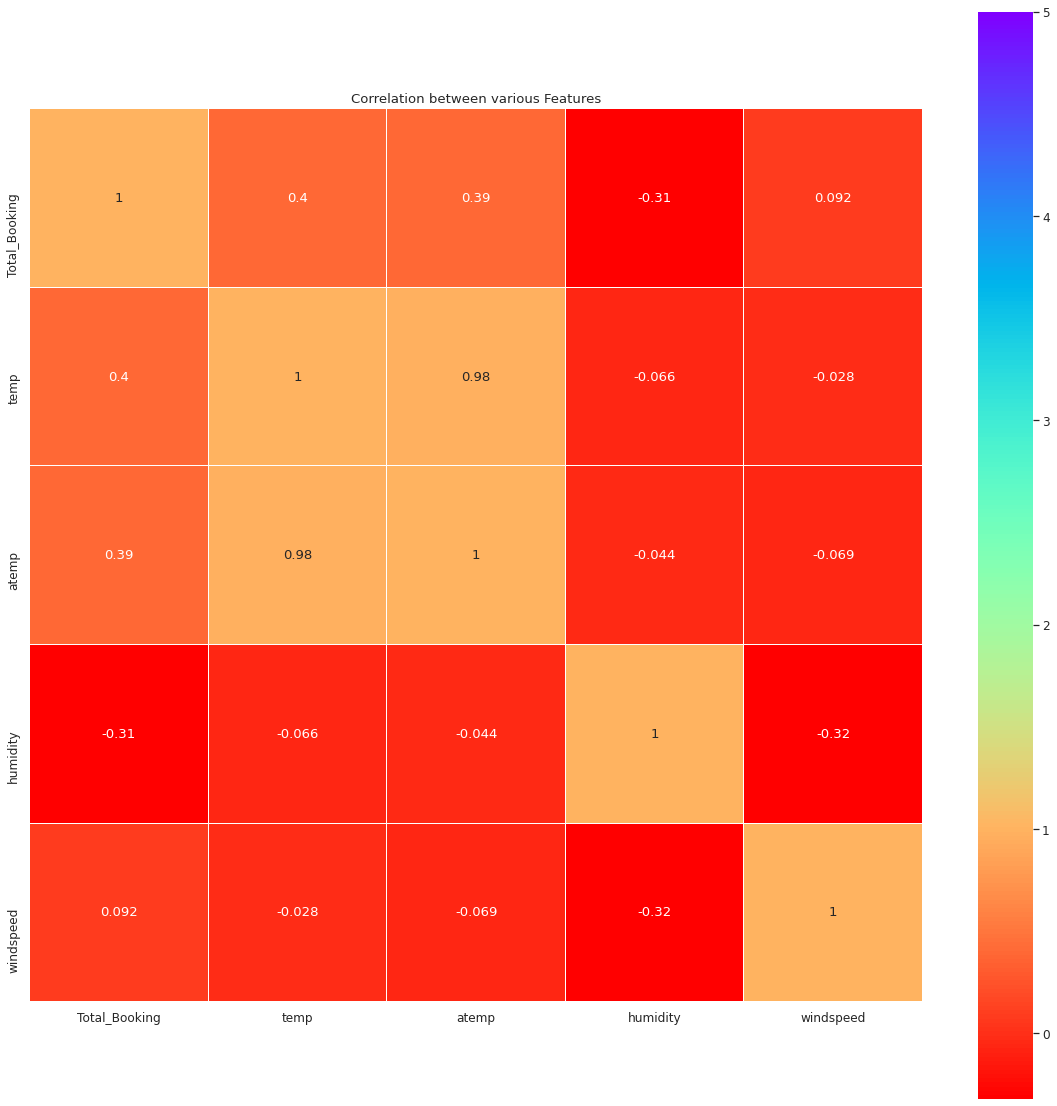

In [23]:
corrMatrix = df1[['Total_Booking', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed']].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(20,20))
sns.heatmap(corrMatrix, vmax=5, linewidths=0.01,square=True,annot=True,cmap='rainbow_r')
plt.title("Correlation between various Features")

1) 'temp' and 'atemp' has strong correlation with each other. Hence, one of the variable ('atemp') has to be dropped while model building to avoid multicollinearity in the data.

2) 'temp' has got positive correlation with 'Total_Booking'. Even though the correlation is not so prominent, still the target variable 'Total_Booking' has some dependency on 'temp'.

3)'humidity' has got negative correlation with 'Total_Booking'. Even though the correlation is not so prominent, still the target variable 'Total_Booking' has some dependency on 'humidity'.

4)'windspeed'has negligible correlation with 'Total_Booking'.



# Data Visualization: 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.77290246, -3.54563229, -3.42075996, ...,  3.42075996,
          3.54563229,  3.77290246]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.59850903, 6.60394382,
         6.60394382])),
 (1.344819111731776, 4.574704492098911, 0.9574275569332248))

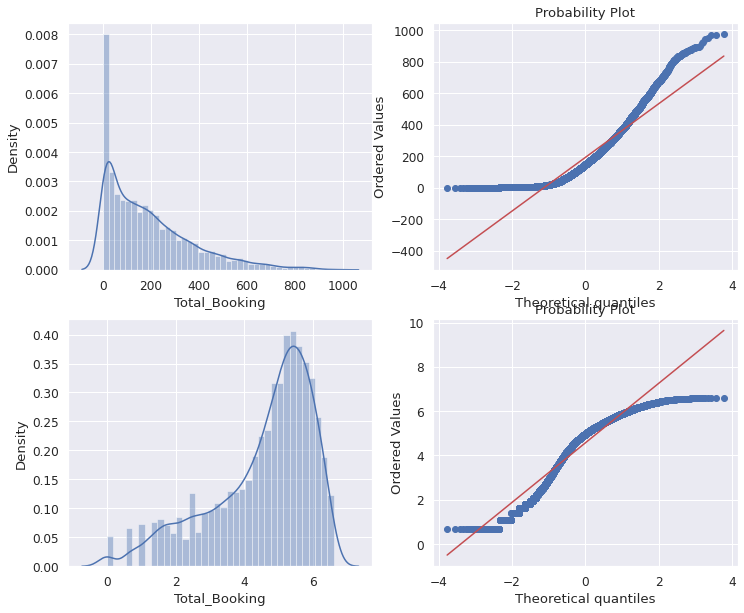

In [24]:
fig,axes=plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12,10)
sns.distplot(df1['Total_Booking'],ax=axes[0][0])
stats.probplot(df1['Total_Booking'], dist='norm',fit=True,plot=axes[0][1])
sns.distplot(np.log(clean_df1['Total_Booking']),ax=axes[1][0])
stats.probplot(np.log1p(clean_df1['Total_Booking']), dist='norm',fit=True,plot=axes[1][1])


Total_Booking is skewed towards right.
Dependent variables in ML models desired to have a normal distribution.
Hence outliers are removed and log transformation is carried out.
After transformation data looks more close to normal distribution however ideal normal curve is not achieved.

        month  Total_Booking
0       April     180.146739
1      August     235.801642
2    December     179.090041
3    February     107.832642
4     January      91.033189
5        July     237.740791
6        June     243.039510
7       March     151.256944
8         May     222.236589
9    November     190.572973
10    October     233.325386
11  September     238.500690


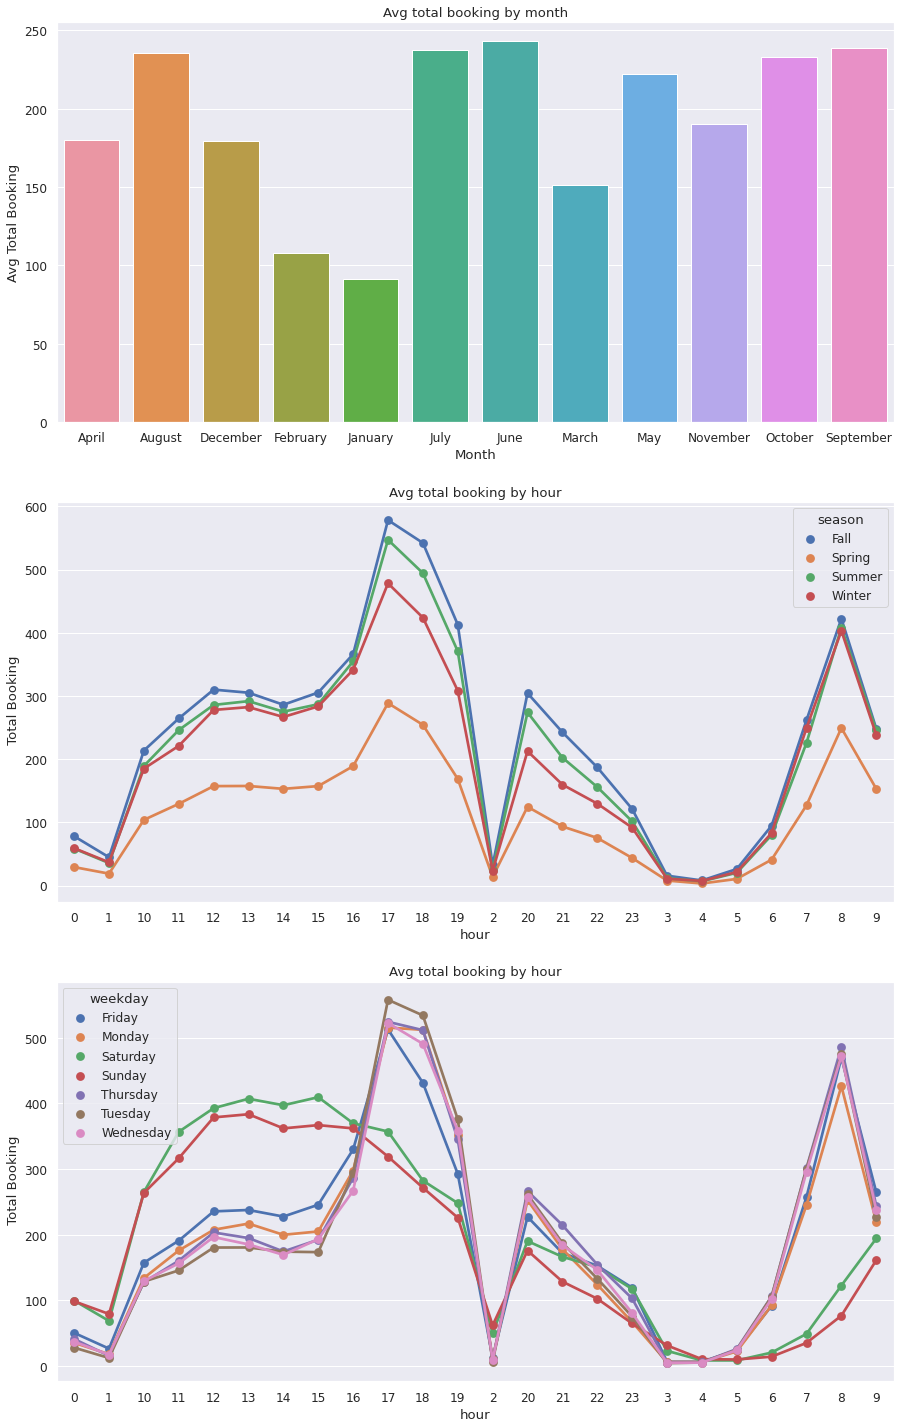

In [25]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3)
fig.set_size_inches(15,25)

monthgroup= pd.DataFrame(df1.groupby("month")['Total_Booking'].mean()).reset_index()
sns.barplot(data=monthgroup,x='month',y='Total_Booking',ax=ax1)
ax1.set(xlabel='Month',ylabel='Avg Total Booking',title='Avg total booking by month')

hourgroup= pd.DataFrame(df1.groupby(["hour",'season'],sort=True)['Total_Booking'].mean()).reset_index()
sns.pointplot(data=hourgroup,x=hourgroup['hour'],y=hourgroup['Total_Booking'],hue=hourgroup['season'],ax=ax2)
ax2.set(xlabel='hour',ylabel=' Total Booking',title='Avg total booking by hour')

hourgroup= pd.DataFrame(df1.groupby(["hour","weekday"],sort=True)['Total_Booking'].mean()).reset_index()
sns.pointplot(data=hourgroup,x=hourgroup['hour'],y=hourgroup['Total_Booking'],hue=hourgroup['weekday'],ax=ax3)
ax3.set(xlabel='hour',ylabel=' Total Booking',title='Avg total booking by hour')


print(monthgroup)





Histograms plotting all the continuous variables present in the data


Text(0.5, 1.0, 'variation of humidity')

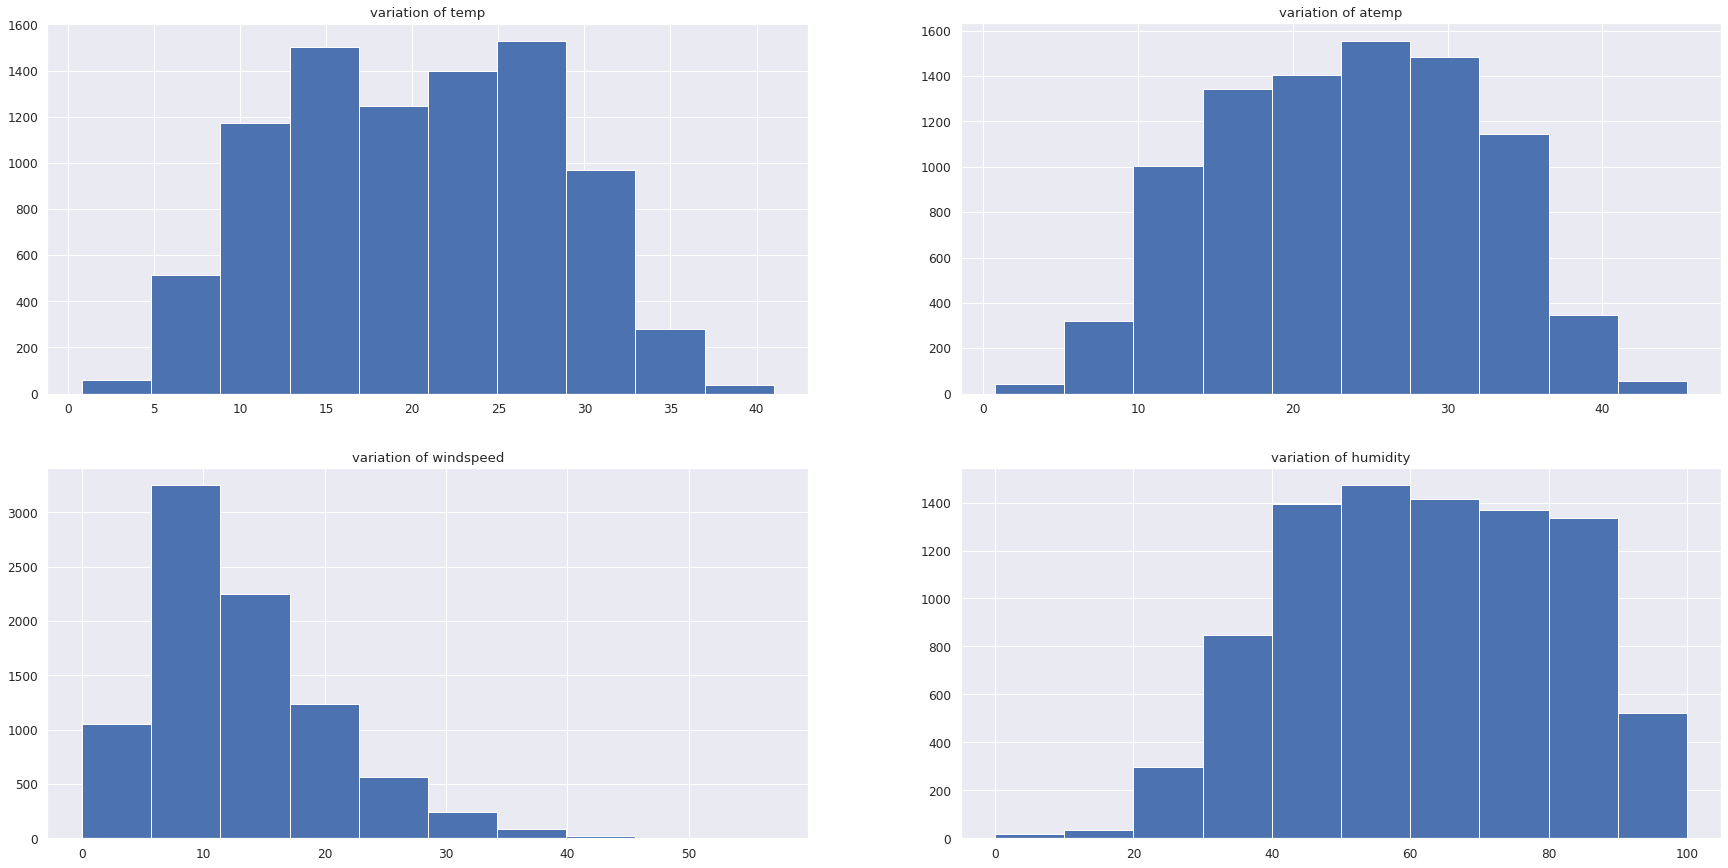

In [26]:

fig,axes=plt.subplots(2,2)

axes[0,0].hist(x='temp',data=df1)
axes[0,0].set_title('variation of temp')

axes[0,1].hist(x='atemp',data=df1)
axes[0,1].set_title('variation of atemp')

axes[1,0].hist(x='windspeed',data=df1)
axes[1,0].set_title('variation of windspeed')

axes[1,1].hist(x='humidity',data=df1)
axes[1,1].set_title('variation of humidity')

One Hot Encoding

In [27]:
df=clean_df1.append(df2,sort=False)
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)
print(df.shape)
df.head()

(10769, 13)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,hour,weekday,month
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September


In [28]:
season=pd.get_dummies(df['season'])
df=pd.concat([df,season],axis=1)

weather=pd.get_dummies(df['weather'])
df=pd.concat([df,weather],axis=1)

weekday=pd.get_dummies(df['weekday'])
df=pd.concat([df,weekday],axis=1)

month=pd.get_dummies(df['month'])
df=pd.concat([df,month],axis=1)

In [29]:

df.head()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_Booking,date,hour,weekday,month,Fall,Spring,Summer,Winter,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
df.drop(['season','weather','date','weekday','month','atemp'],inplace=True,axis=1)
df.shape

(10769, 34)

In [31]:
df_train=df[:df1.shape[0]]
df_test=df[df1.shape[0]:]

In [32]:
df_train.shape, df_test.shape

((8708, 34), (2061, 34))

In [33]:
df_train.head()

,holiday,workingday,temp,humidity,windspeed,Total_Booking,hour,Fall,Spring,Summer,Winter,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",Mist + Cloudy,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September
0,0,1,22.14,77,16.9979,504,19,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,28.70,79,19.0012,5,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,5.74,50,22.0028,139,9,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,13.94,29,8.9981,209,16,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,30.34,51,19.0012,184,13,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
y_train=df_train['Total_Booking']
x_train=df_train.drop(['Total_Booking'],axis=1)

y_test=df_test['Total_Booking']
x_test=df_test.drop(['Total_Booking'],axis=1)


print(x_train,y_train,x_test,y_test)

     holiday workingday   temp  humidity  ...  May November  October  September
0          0          1  22.14        77  ...    1        0        0          0
1          0          1  28.70        79  ...    0        0        0          1
2          0          1   5.74        50  ...    0        0        0          0
3          0          1  13.94        29  ...    0        1        0          0
4          0          1  30.34        51  ...    0        0        0          1
...      ...        ...    ...       ...  ...  ...      ...      ...        ...
8703       0          1  12.30        28  ...    0        0        0          0
8704       0          1  13.94        66  ...    0        0        0          0
8705       0          1  16.40        66  ...    0        0        0          0
8706       0          1  26.24        78  ...    0        0        0          0
8707       0          1  26.24        73  ...    0        0        0          0

[8708 rows x 33 columns] 0       504
1 

Fit various models (Random Forest Regressor, Ada Boost Regressor, Bagging Regressor,
SVR, and K-Neighbors Regressor) 


In [35]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state = 42)

rf.fit(x_train,y_train)

y_pred_train_RF=rf.predict(x_train)


y_pred_test_RF=rf.predict(x_test)

mse_test_RF = mean_squared_error(y_test,y_pred_test_RF)
RMSE_RF = np.sqrt(mse_test_RF)
r_squared_test_RF = r2_score(y_test,y_pred_test_RF)
MSLE_RF=mean_squared_log_error(y_test,y_pred_test_RF)

print("RMSE for TEST dataset with RF model is: ", RMSE_RF)
print("R Squared for TEST dataset with RF model is: ", r_squared_test_RF)
print("***************************************")
mse_train_RF = mean_squared_error(y_train,y_pred_train_RF)
rmse_train_RF = np.sqrt(mse_train_RF)
r_squared_train_RF = r2_score(y_train,y_pred_train_RF)

print("RMSE for train dataset with RF model is: ", rmse_train_RF)
print("R Squared for train dataset with RF model is: ", r_squared_train_RF)
print("***************************************")

print('mean_squared_log_error:',MSLE_RF)

rf.get_params()


RMSE for TEST dataset with RF model is:  67.40050122922601
R Squared for TEST dataset with RF model is:  0.8590618910322635
***************************************
RMSE for train dataset with RF model is:  23.12366624585824
R Squared for train dataset with RF model is:  0.9808577927691138
***************************************
mean_squared_log_error: 0.1714161329437765


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [36]:
#ADA BOOST REGRESSOR
from sklearn.ensemble import AdaBoostRegressor
adb= AdaBoostRegressor(n_estimators=200)

adb.fit(x_train,y_train)

y_pred_train_ADA=adb.predict(x_train)


y_pred_test_ADA=adb.predict(x_test)

mse_test_ADA = mean_squared_error(y_test,y_pred_test_ADA)
RMSE_ADA = np.sqrt(mse_test_ADA)
r_squared_test_ADA = r2_score(y_test,y_pred_test_ADA)
MSLE_ADA=mean_squared_log_error(y_test,y_pred_test_ADA)


print("RMSE for TEST dataset with ADA model is: ", RMSE_ADA)
print("R Squared for TEST dataset with ADA model is: ", r_squared_test_ADA)
print("***************************************")
mse_train_ADA = mean_squared_error(y_train,y_pred_train_ADA)
rmse_train_ADA = np.sqrt(mse_train_ADA)
r_squared_train_ADA = r2_score(y_train,y_pred_train_ADA)

print("RMSE for train dataset with ADA model is: ", rmse_train_ADA)
print("R Squared for train dataset with ADA model is: ", r_squared_train_ADA)

print('mean_squared_log_error:',MSLE_ADA)

RMSE for TEST dataset with ADA model is:  123.90927230622292
R Squared for TEST dataset with ADA model is:  0.5236679537603697
***************************************
RMSE for train dataset with ADA model is:  117.76691962532449
R Squared for train dataset with ADA model is:  0.5034931324802289
mean_squared_log_error: 1.0793439335737307


In [37]:

#Bagging BOOST REGRESSOR
from sklearn.ensemble import BaggingRegressor
br= BaggingRegressor()

br.fit(x_train,y_train)

y_pred_train_BR=br.predict(x_train)


y_pred_test_BR=br.predict(x_test)

mse_test_BR = mean_squared_error(y_test,y_pred_test_BR)
RMSE_BR = np.sqrt(mse_test_BR)
r_squared_test_BR = r2_score(y_test,y_pred_test_BR)
MSLE_BR=mean_squared_log_error(y_test,y_pred_test_BR)


print("RMSE for TEST dataset with BR model is: ", RMSE_BR)
print("R Squared for TEST dataset with BR model is: ", r_squared_test_BR)
print("***************************************")
mse_train_BR = mean_squared_error(y_train,y_pred_train_BR)
rmse_train_BR = np.sqrt(mse_train_BR)
r_squared_train_BR = r2_score(y_train,y_pred_train_BR)

print("RMSE for train dataset with BR model is: ", rmse_train_BR)
print("R Squared for train dataset with BR model is: ", r_squared_train_BR)

print('mean_squared_log_error:',MSLE_BR)

RMSE for TEST dataset with BR model is:  68.7947506834903
R Squared for TEST dataset with BR model is:  0.8531706792130278
***************************************
RMSE for train dataset with BR model is:  27.833474588992523
R Squared for train dataset with BR model is:  0.9722659382346396
mean_squared_log_error: 0.18196994002587896


In [38]:
#SVR
from sklearn.svm import SVR
svr= SVR(kernel='linear',epsilon=0.2)

svr.fit(x_train,y_train)

y_pred_train_SVR=svr.predict(x_train)


y_pred_test_SVR=svr.predict(x_test)

mse_test_SVR = mean_squared_error(y_test,y_pred_test_SVR)
RMSE_SVR = np.sqrt(mse_test_SVR)
r_squared_test_SVR = r2_score(y_test,y_pred_test_SVR)



print("RMSE for TEST dataset with SVR model is: ", RMSE_SVR)
print("R Squared for TEST dataset with SVR model is: ", r_squared_test_SVR)
print("***************************************")
mse_train_SVR = mean_squared_error(y_train,y_pred_train_SVR)
rmse_train_SVR = np.sqrt(mse_train_SVR)
r_squared_train_SVR = r2_score(y_train,y_pred_train_SVR)

print("RMSE for train dataset with SVR model is: ", rmse_train_SVR)
print("R Squared for train dataset with SVR model is: ", r_squared_train_SVR)




RMSE for TEST dataset with SVR model is:  148.36238215629098
R Squared for TEST dataset with SVR model is:  0.3171115247437173
***************************************
RMSE for train dataset with SVR model is:  138.3137999874345
R Squared for train dataset with SVR model is:  0.3151276152321105


In [39]:
#K-NEIGHBORS REGRESSOR
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=3)
kn.fit(x_train,y_train)

y_pred_train_KN=kn.predict(x_train)


y_pred_test_KN=kn.predict(x_test)

mse_test_KN = mean_squared_error(y_test,y_pred_test_KN)
RMSE_KN = np.sqrt(mse_test_KN)
r_squared_test_KN = r2_score(y_test,y_pred_test_KN)
MSLE_KNN=mean_squared_log_error(y_test,y_pred_test_KN)


print("RMSE for TEST dataset with KNN model is: ", RMSE_KN)
print("R Squared for TEST dataset with KNN model is: ", r_squared_test_KN)
print("***************************************")
mse_train_KN = mean_squared_error(y_train,y_pred_train_KN)
rmse_train_KN = np.sqrt(mse_train_KN)
r_squared_train_KN = r2_score(y_train,y_pred_train_KN)

print("RMSE for train dataset with KNN model is: ", rmse_train_KN)
print("R Squared for train dataset with KNN model is: ", r_squared_train_KN)

print('mean_squared_log_error:',MSLE_KNN)


RMSE for TEST dataset with KNN model is:  120.73271550154476
R Squared for TEST dataset with KNN model is:  0.5477775429588694
***************************************
RMSE for train dataset with KNN model is:  79.36203833810463
R Squared for train dataset with KNN model is:  0.7745219572884184
mean_squared_log_error: 0.6505227671777201


FACTOR PLOT

   0 TRAINING Model  TRAINING DATA SET RMSE VALUES
0  0             RF                      23.123666
1  1            ADA                     117.766920
2  2            BAG                      27.833475
3  3            SVR                     138.313800
4  4            KNN                      79.362038


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


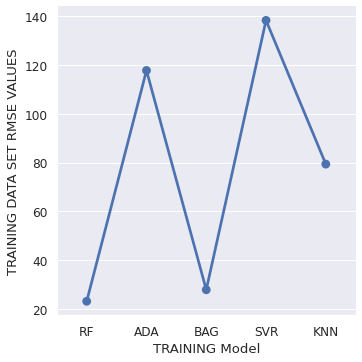

In [40]:
#Training Data Set
RMSE_train=[rmse_train_RF,rmse_train_ADA,rmse_train_BR,rmse_train_SVR,rmse_train_KN]
df_A=pd.DataFrame([0,1,2,3,4])
df_A['TRAINING Model']=pd.DataFrame(data=['RF','ADA','BAG','SVR','KNN'])
df_A['TRAINING DATA SET RMSE VALUES']=pd.DataFrame(data=RMSE_train)

print(df_A)
  
# point plot(by default)
sns.factorplot(x ='TRAINING Model', y ='TRAINING DATA SET RMSE VALUES', data = df_A)
  
# Show the plot
plt.show()

   0 Model  RMSE VALUES TESTING DATASET
0  0    RF                    67.400501
1  1   ADA                   123.909272
2  2   BAG                    68.794751
3  3   SVR                   148.362382
4  4   KNN                   120.732716


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


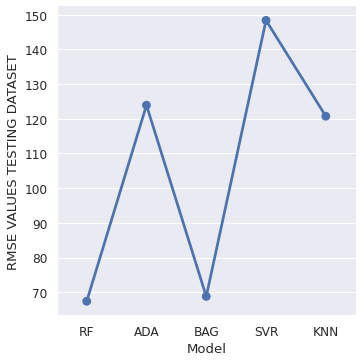

In [41]:
#Testing Data Set
RMSE_TEST=[RMSE_RF,RMSE_ADA,RMSE_BR,RMSE_SVR,RMSE_KN]
df_A=pd.DataFrame([0,1,2,3,4])
df_A['Model']=pd.DataFrame(data=['RF','ADA','BAG','SVR','KNN'])
df_A['RMSE VALUES TESTING DATASET']=pd.DataFrame(data=RMSE_TEST)

print(df_A)
  
# point plot(by default)
sns.factorplot(x ='Model', y ='RMSE VALUES TESTING DATASET', data = df_A)
  
# Show the plot
plt.show()

we can clearly conclude that Random forest regressor is the best model.

Hyper-parameter tuning on the best model using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestRegressor()

param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 20,25],
    'n_estimators': [50, 100, 200]
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

param_grid = {
    param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 15, 20,25],
    'n_estimators': [50, 100, 150, 200]
}
CV_rfc.best_params_
 
 {'bootstrap': True, 'max_depth': 20, 'n_estimators': 200}

In [ ]:

rfc=RandomForestRegressor(bootstrap= True,max_depth= 20,n_estimators=200)

rfc.fit(x_train,y_train)

y_pred_train_RFc=rfc.predict(x_train)

y_pred_test_RFc=rfc.predict(x_test)

mse_test_RFc = mean_squared_error(y_test,y_pred_test_RFc)
r_squared_test_RFc = r2_score(y_test,y_pred_test_RFc)
RMSE_RFc = np.sqrt(mse_test_RFc)
MSLE_RFc=mean_squared_log_error(y_test,y_pred_test_RFc)

print("RMSE for TEST dataset with RF model using grid search is: ", RMSE_RFc)


print('mean_squared_log_error:',MSLE_RFc)



Rf Model improved slightly after hyperparameter tuning.